<a href="https://colab.research.google.com/github/sahilshah9111/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns',None)

In [ ]:
dataset = pd.read_excel('Data.xlsx')
dataset.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [ ]:
dataset.shape

(414, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [ ]:
dataset.isna().any() #Checking for null/missing values

Transaction date                            False
House Age                                   False
Distance from nearest Metro station (km)    False
Number of convenience stores                False
latitude                                    False
longitude                                   False
Number of bedrooms                          False
House size (sqft)                           False
House price of unit area                    False
dtype: bool

In [ ]:
#Converting Transaction Date column from float to datetime type
dataset['Transaction date'] = pd.to_datetime(dataset['Transaction date'].map('{:.2f}'.format), errors = 'coerce', infer_datetime_format=True)
dataset.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012-01-01,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012-01-01,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013-01-01,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013-01-01,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012-01-01,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Transaction date                          414 non-null    datetime64[ns]
 1   House Age                                 414 non-null    float64       
 2   Distance from nearest Metro station (km)  414 non-null    float64       
 3   Number of convenience stores              414 non-null    int64         
 4   latitude                                  414 non-null    float64       
 5   longitude                                 414 non-null    float64       
 6   Number of bedrooms                        414 non-null    int64         
 7   House size (sqft)                         414 non-null    int64         
 8   House price of unit area                  414 non-null    float64       
dtypes: datetime64[ns](1), float64(5),

Text(0.5, 1.0, 'House Price vs Year')

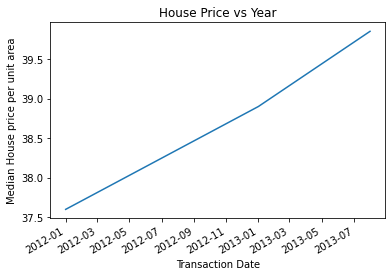

In [ ]:
dataset.groupby('Transaction date')['House price of unit area'].median().plot()
plt.xlabel('Transaction Date')
plt.ylabel('Median House price per unit area')
plt.title('House Price vs Year')

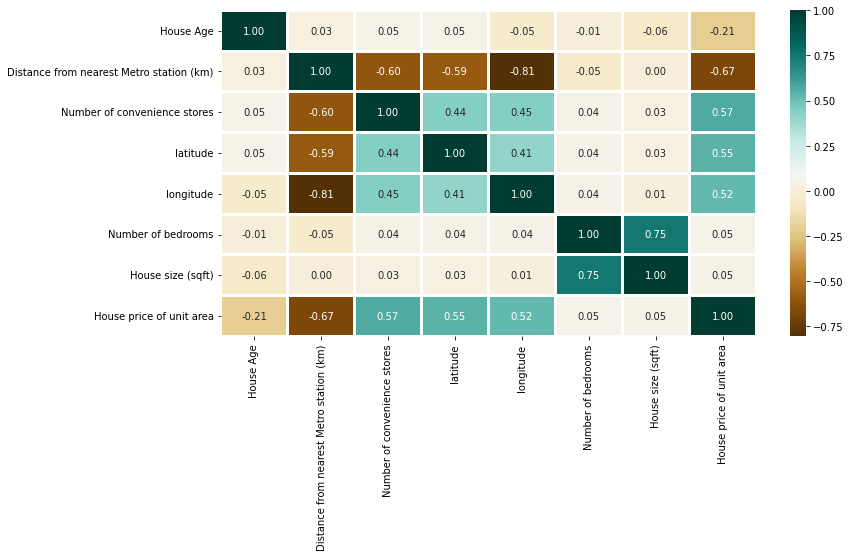

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)


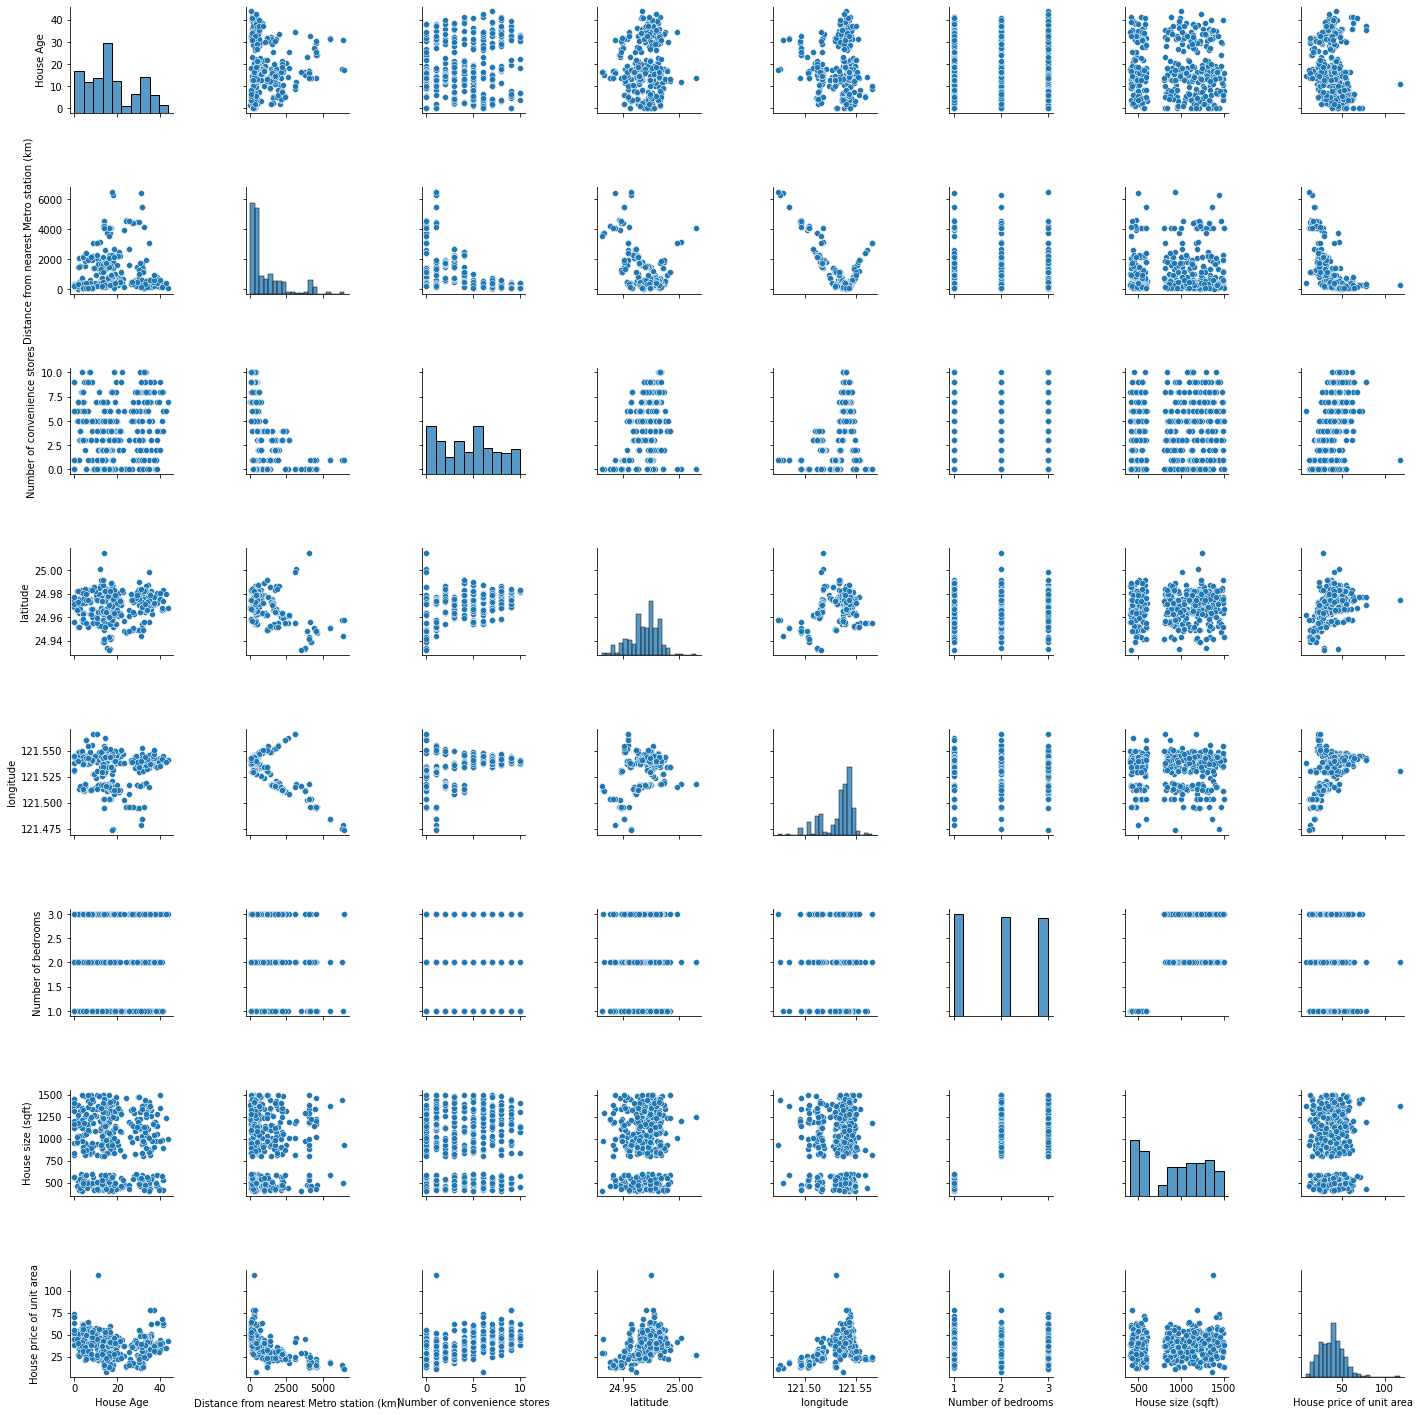

In [ ]:
sns.pairplot(dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


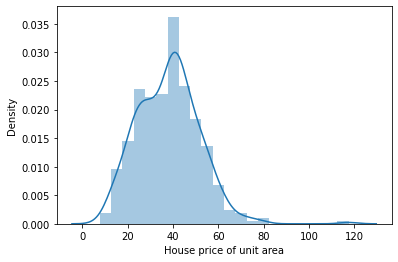

In [ ]:
sns.distplot(dataset['House price of unit area'])

In [ ]:
dataset.duplicated(keep = 'first').sum() #Checking for duplicates

0

In [ ]:
X = dataset.iloc[:,1:8]
X

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,32.0,84.87882,10,24.98298,121.54024,1,575
1,19.5,306.59470,9,24.98034,121.53951,2,1240
2,13.3,561.98450,5,24.98746,121.54391,3,1060
3,13.3,561.98450,5,24.98746,121.54391,2,875
4,5.0,390.56840,5,24.97937,121.54245,1,491
...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,3,803
410,5.6,90.45606,9,24.97433,121.54310,2,1278
411,18.8,390.96960,7,24.97923,121.53986,1,503
412,8.1,104.81010,5,24.96674,121.54067,1,597


In [ ]:
y=dataset['House price of unit area']
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: House price of unit area, Length: 414, dtype: float64

**TRAIN-TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [ ]:
X_train

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
13,20.4,2469.64500,4,24.96108,121.51046,3,928
181,11.6,201.89390,8,24.98489,121.54121,3,1482
154,16.9,4066.58700,0,24.94297,121.50342,1,532
109,4.0,2147.37600,3,24.96299,121.51284,2,1044
32,37.9,488.57270,1,24.97349,121.53451,3,978
...,...,...,...,...,...,...,...
63,2.6,533.47620,4,24.97445,121.54765,2,1309
326,4.1,56.47425,7,24.95744,121.53711,1,470
337,31.3,600.86040,5,24.96871,121.54651,2,1333
11,6.3,90.45606,9,24.97433,121.54310,3,1423


In [ ]:
X_test

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
176,13.9,4573.7790,0,24.94867,121.49507,3,1206
347,17.4,6488.0210,1,24.95719,121.47353,3,933
307,10.3,3079.8900,0,24.95460,121.56627,2,812
299,33.2,121.7262,10,24.98178,121.54059,3,1297
391,6.2,1939.7490,1,24.95155,121.55387,3,1494
...,...,...,...,...,...,...,...
65,40.1,123.7429,8,24.97635,121.54329,3,1351
48,24.2,4605.7490,0,24.94684,121.49578,1,470
18,16.9,368.1363,8,24.96750,121.54451,3,1291
15,35.7,579.2083,2,24.98240,121.54619,2,1322


In [ ]:
y_train

13     23.8
181    55.9
154    20.7
109    28.4
32     34.2
       ... 
63     55.0
326    62.1
337    30.9
11     58.1
351    28.6
Name: House price of unit area, Length: 331, dtype: float64

In [ ]:
y_test

176    19.2
347    11.2
307    24.7
299    46.1
391    31.3
       ... 
65     44.3
48     13.4
18     42.3
15     50.5
143    40.1
Name: House price of unit area, Length: 83, dtype: float64

**FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [ ]:
X_train_std

array([[ 0.28072803,  1.12273684,  0.01698397, ..., -1.51530529,
         1.23404451,  0.00362431],
       [-0.49040041, -0.72371359,  1.42240753, ...,  0.52872867,
         1.23404451,  1.62857499],
       [-0.02597078,  2.42300046, -1.38843959, ..., -1.98327274,
        -1.21922115, -1.15789278],
       ...,
       [ 1.23587575, -0.39886672,  0.36833986, ...,  0.88103371,
         0.00741168,  1.19153952],
       [-0.95483004, -0.81444862,  1.77376342, ...,  0.65436198,
         1.23404451,  1.45552068],
       [-1.15637497,  0.8871013 , -0.33437192, ..., -1.38568362,
        -1.21922115, -1.18135777]])

In [ ]:
X_test_std

array([[-2.88855479e-01,  2.83596681e+00, -1.38843959e+00,
        -1.60785280e+00, -2.53831935e+00,  1.23404451e+00,
         8.19032777e-01],
       [ 1.78433318e-02,  4.39458273e+00, -1.03708370e+00,
        -9.24882140e-01, -3.97014021e+00,  1.23404451e+00,
         1.82899332e-02],
       [-6.04317114e-01,  1.61961110e+00, -1.38843959e+00,
        -1.13249881e+00,  2.19453326e+00,  7.41167874e-03,
        -3.36618067e-01],
       [ 1.40236939e+00, -7.88987815e-01,  2.12511931e+00,
         1.04627380e+00,  4.87515629e-01,  1.23404451e+00,
         1.08594706e+00],
       [-9.63592864e-01,  6.91284421e-01, -1.03708370e+00,
        -1.37698948e+00,  1.37027241e+00,  1.23404451e+00,
         1.66377248e+00],
       [ 3.53689781e-02,  5.82110420e-01, -6.85727810e-01,
         1.44226853e+00, -8.20666104e-01,  7.41167874e-03,
         1.32059698e+00],
       [ 1.35855528e+00, -5.68562166e-01,  7.19695751e-01,
        -3.80589793e-01,  6.14478389e-01, -1.21922115e+00,
        -1.3368133

**MODEL TRAINING**

1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(X_train_std,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test_std)

In [ ]:
y_pred

array([13.80128072,  7.65295392, 23.44944773, 48.55676049, 30.07180048,
       37.16364169, 37.87741814, 40.59080164, 46.44603655, 40.57599575,
       43.55044281, 32.69823567, 38.70538411, 37.20886309, 46.55275082,
       48.87591702, 38.05169447, 46.63259317, 50.28317547, 47.77748585,
       40.14881381, 53.34723252, 47.23524437, 37.14104714, 31.42379732,
       50.95654828, 39.14469632, 49.01876609, 45.73363068, 37.98490741,
       50.09107386, 41.86584446, 43.83465943, 45.98426132, 45.30786623,
        6.97722204, 37.51935882, 39.11894676,  6.48495574, 55.43516841,
       30.25836631, 47.68711921, 23.41202962, 48.92085732, 42.74726685,
       50.80488919, 40.82106196, 36.65171686, 45.41637599, 35.93044244,
       46.94484034, 36.06869848, 42.51271039, 13.59709504, 38.51224952,
       47.92310235, 43.09134263, 45.75866866, 43.50561258, 40.27096128,
       32.51692798, 43.95562149, 41.9269845 , 42.1626809 , 52.65056683,
       42.63118497, 24.08503178, 48.42027324, 30.95577345, 39.02

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(y_test,y_pred)

5.280029111048574

In [ ]:
r2_score(y_test,y_pred)

0.5900832936631123

2. Support Vector Machine-SVM

In [ ]:
from sklearn import svm
model_SVR = svm.SVR()

In [ ]:
model_SVR.fit(X_train_std,y_train)

SVR()

In [ ]:
y_pred = model_SVR.predict(X_test_std)

In [ ]:
y_pred

array([22.43065561, 29.27597583, 26.03631643, 39.90400588, 29.45234508,
       34.22754246, 38.02401547, 40.31154234, 45.57467549, 38.00039315,
       39.63492834, 30.66247637, 37.05541681, 36.07420643, 41.60510955,
       40.51149092, 36.58263063, 41.35936349, 42.96544792, 46.30459632,
       38.05760355, 50.16957906, 46.7482752 , 37.49743566, 28.39362535,
       48.9476674 , 36.10716153, 40.47182556, 39.94600333, 34.95271452,
       46.46917544, 41.65242654, 38.92886561, 44.38255763, 40.16089465,
       25.74313227, 34.37581513, 34.45098222, 26.47282533, 46.94360633,
       29.52079805, 40.75938066, 25.56214563, 45.8771354 , 38.64576031,
       41.08508093, 38.88532976, 31.71660795, 40.02960817, 35.81993636,
       44.06954609, 35.43474561, 39.62560624, 21.86522674, 38.25140449,
       44.82531553, 41.47670685, 45.73838961, 41.28395004, 38.81618099,
       32.8618765 , 41.66522192, 40.89746572, 39.97857908, 48.75337455,
       42.01608192, 25.77798011, 46.02719286, 25.94225141, 33.58

In [ ]:
mean_absolute_error(y_test,y_pred)

4.963663484337539

In [ ]:
r2_score(y_test,y_pred)

0.6144028400516333

3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_std, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = tree_reg.predict(X_test_std)

In [ ]:
y_pred

array([13. , 23.2, 22. , 33.1, 23.5, 23.5, 34.4, 42.5, 46.2, 42.2, 40.3,
       28.8, 26.5, 27.3, 46.7, 40.3, 31.9, 40.5, 54.8, 41.6, 29.3, 59.5,
       55.1, 41. , 23.6, 49.7, 42.4, 49.3, 39.7, 38.5, 60.7, 42.5, 33.1,
       56.8, 32.2, 15. , 40.6, 23.7, 21.8, 56.8, 29.5, 40.3, 20.7, 47. ,
       54.8, 44.2, 42.2, 21.5, 33.1, 41. , 46.6, 30.9, 42.2, 20.7, 41. ,
       47.3, 41.5, 32.5, 37.7, 36.6, 26.5, 55.2, 42.3, 41.1, 50.8, 34.4,
       24.8, 51.7, 24.6, 30.7, 39.4, 39.4, 29.3, 30.7, 20. , 42. , 21.4,
       37.5, 67.7, 15.6, 40.8, 30.9, 31.3])

In [ ]:
mean_absolute_error(y_test,y_pred)

6.415662650602409

In [ ]:
r2_score(y_test,y_pred)

0.3731881073025344

4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_std, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = forest_reg.predict(X_test_std)

In [ ]:
y_pred

array([16.767, 20.19 , 23.403, 45.749, 24.738, 31.485, 37.561, 42.322,
       45.603, 42.099, 36.664, 30.083, 34.148, 26.373, 45.666, 41.829,
       38.723, 52.206, 48.838, 45.815, 31.855, 57.984, 47.178, 46.882,
       23.736, 50.94 , 33.314, 50.125, 40.322, 40.174, 50.915, 41.409,
       35.571, 53.003, 32.636, 18.924, 39.583, 23.976, 19.818, 54.932,
       24.821, 38.738, 18.571, 51.773, 45.035, 40.559, 38.03 , 23.058,
       38.164, 38.814, 39.562, 35.554, 39.294, 16.264, 38.697, 45.888,
       45.586, 37.385, 35.893, 38.699, 35.219, 53.185, 43.474, 40.943,
       54.825, 39.225, 23.76 , 50.2  , 23.643, 26.793, 46.229, 46.519,
       33.797, 30.002, 16.582, 48.022, 23.615, 40.366, 57.881, 15.834,
       39.951, 39.623, 36.566])

In [ ]:
mean_absolute_error(y_test,y_pred)

4.912626506024095

In [ ]:
r2_score(y_test,y_pred)

0.6587764720268935

I have gone through more than one regression models. As shown above, on comparision of all the models, Random Forest regresion model has least MAE or mean absolute error and greater R2 score than the others, so the Random Forest model is chosen as the most apprpriate model in this case. Random Forest has higher precision and accuracy than others.